# Sensing and Intelligent System: ICP Exercise

By Chang-Yi Kuo and Nick Wang

## Import Packages

In [1]:
import numpy as np
import scipy as sp
import cv2
import time
from matplotlib import pyplot as plt

from skimage.measure import LineModelND, ransac

%matplotlib inline
# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

## ICP Exercise

In this exercise you will use a standard ICP algorithm with the point-to-point distance metric to estimate the transform between the 2D datasets (model - red and target - green) depicted in the below figure. For the correspondence estimation please use the nearest neighbor search with the maximum radius set to 4 grid units.

[0, 18, 0, 18]

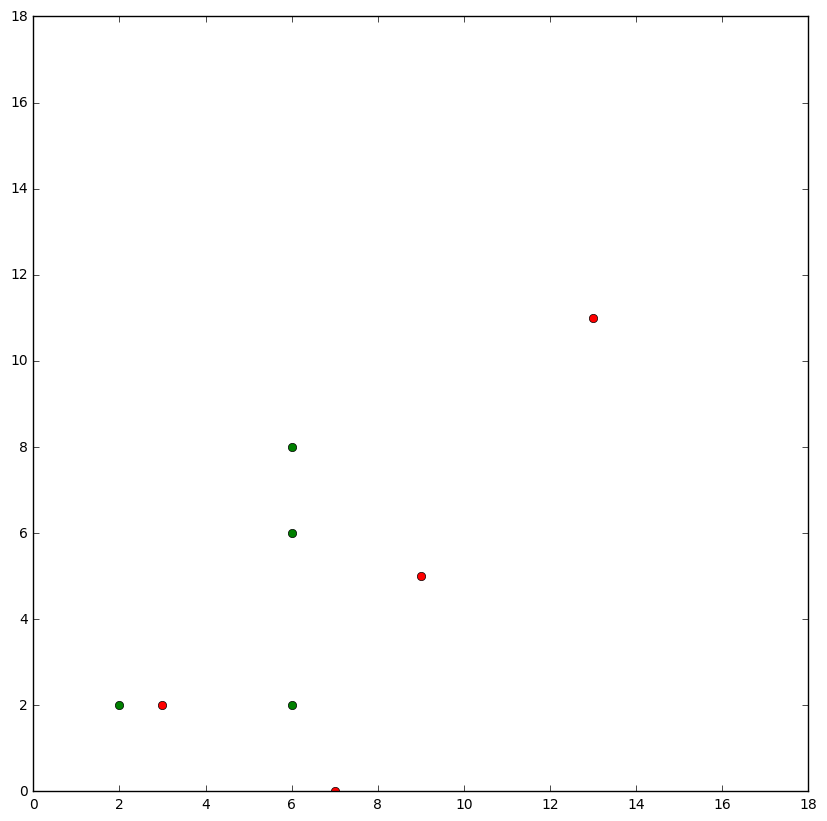

In [2]:
plt.plot([3,7,9,13], [2,0,5,11], 'ro')
plt.plot([2,6,6,6], [2,2,6,8], 'go')
plt.axis([0, 18, 0, 18])

### 1. Find Point Pairs. You should be careful about the NN search radius, and reject outlier.

### 2. Compute Centroids

In [11]:
p_1t = np.array([2, 2], dtype='f')
p_2t = np.array([6, 2], dtype='f')
p_3t = np.array([6, 6], dtype='f')
p_ct = (p_1t + p_2t + p_3t)/3
print p_ct

p_1m = np.array([3, 2], dtype='f')
p_2m = np.array([7, 0], dtype='f')
p_3m = np.array([9, 5], dtype='f')
p_cm = (p_1m + p_2m + p_3m)/3
print p_cm

[ 4.66666651  3.33333325]
[ 6.33333349  2.33333325]


### 3. Build the Correlation Matrix H

In [5]:
p_1td = p_1t - p_ct
p_2td = p_2t - p_ct
p_3td = p_3t - p_ct
# print p_1td,p_2td,p_3td

p_1tm = p_1m - p_cm
p_2tm = p_2m - p_cm
p_3tm = p_3m - p_cm
# print p_1tm,p_2tm,p_3tm

Mtd = np.vstack((p_1td, p_2td, p_3td)).transpose()
# print Mtd
Mmd = np.vstack((p_1tm, p_2tm, p_3tm)).transpose()
# print Mmd

H = np.dot(Mmd, Mtd.transpose())
print H

[[ 13.33333206  10.66666603]
 [  1.33333325  10.66666698]]


### 4. Estimate Rotation Matrix R using SVD

In [6]:
# YOU CODE THIS
# HINT 1: np.linalg.svd()
# HINT 2: np.dot
# HINT 3: U.transpose()

# [U, D, V] = XXX
# R = XXX
# print R

[[ 0.93200469 -0.36244628]
 [ 0.36244628  0.93200469]]


### 5. Estimate the translation vector t

In [7]:
# YOU CODE THIS

# t = np.matrix(p_ct - XXX)
# print t

[[-0.39032221 -1.13683772]]


### 6. Calculate the transform T

The result should be: 
[[ 0.93200469 -0.36244628 -0.39032221]
 [ 0.36244628  0.93200469 -1.13683772]
 [ 0.          0.          1.        ]]

In [8]:
# YOU CODE THIS
# HINT: np.hstack, np.vstack

# temp = np.hstack(XXX)
# zero = np.array([[0,0,1]])
# T = np.vstack((temp,zero))

# print T

[[ 0.93200469 -0.36244628 -0.39032221]
 [ 0.36244628  0.93200469 -1.13683772]
 [ 0.          0.          1.        ]]


### 7. Transform Dataset m using the transform T

In [9]:
p1_m = np.append([np.matrix(p_1m)],[1])
p2_m = np.append([np.matrix(p_2m)],[1])
p3_m = np.append([np.matrix(p_3m)],[1])

t1 = np.dot(T,p1_m.transpose())[0,0:2]
t2 = np.dot(T,p2_m.transpose())[0,0:2]
t3 = np.dot(T,p3_m.transpose())[0,0:2]
print t1
print t2
print t3

[[ 1.68079931  1.81451049]]
[[ 6.13371062  1.40028623]]
[[ 6.18548861  6.78520223]]


[0, 18, 0, 18]

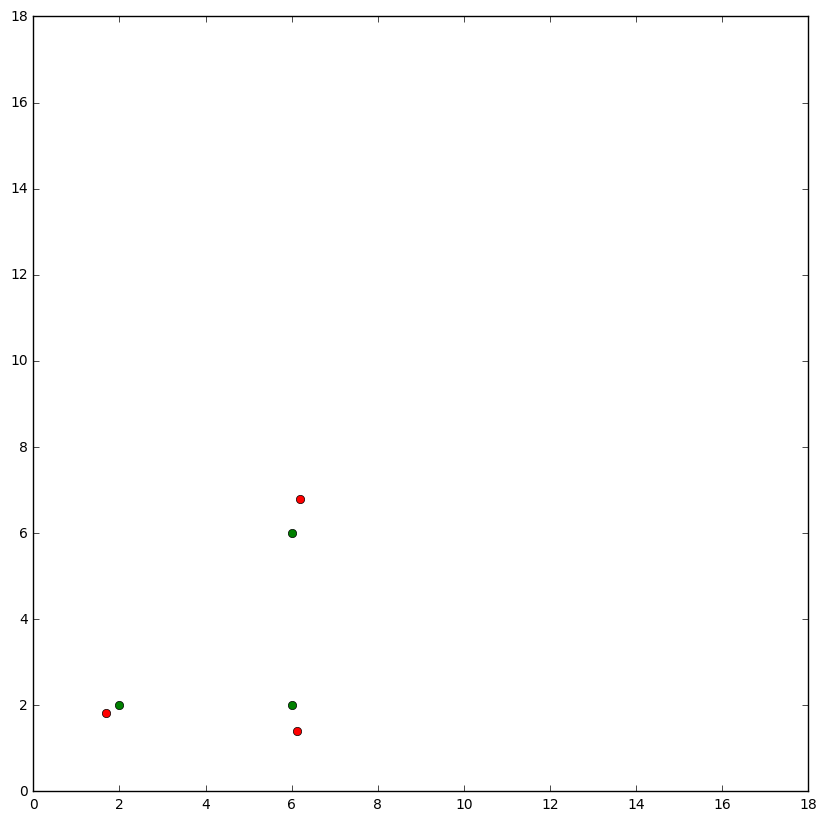

In [10]:
t_x = np.append([t1[0,0]],[t2[0,0],t3[0,0]])
t_y = np.append([t1[0,1]],[t2[0,1],t3[0,1]])
# print t_x
# print t_y
plt.plot(t_x,t_y, 'ro')
plt.plot([2,6,6], [2,2,6], 'go')
plt.axis([0, 18, 0, 18])